In [ ]:
# Import all the required libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [133]:
# Now we are gonna use a library sklearn.datasets and use the method make_regression
#  which helps us create a dataset for Regression problems by taking some paramters . 
from sklearn.datasets import make_regression

In [134]:
X,y = make_regression(n_samples=4,n_features=1, n_informative=1, n_targets=1,noise=20,random_state=42)
# Features = columns for prediction
# Samples  = No of rows 
# Targets = No of predicted column
# Noise = Distortion / Diffusion of the points 
# Random_state = A state value we assign so that the results can be replicated.

In [ ]:
X,y # quickly check values

(array([[ 0.64768854],
        [-0.1382643 ],
        [ 1.52302986],
        [ 0.49671415]]),
 array([-1.51241417, 18.05312487, 13.25870861, 13.33049253]))

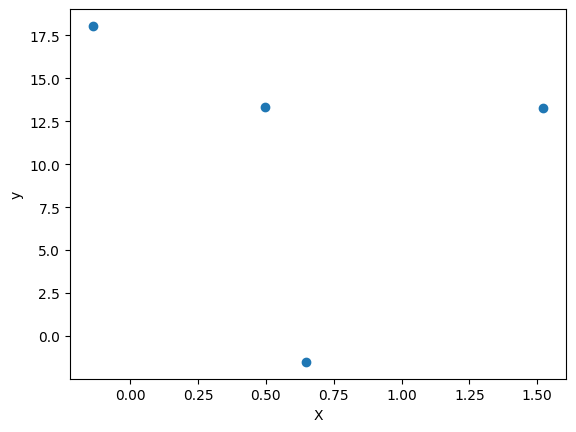

In [ ]:
# Visulizing the points 
plt.scatter(X,y)
plt.xlabel("X")
plt.ylabel("y")
plt.show()

In [ ]:
# Note : In this code we assume that m is known which is in real gradient descent is not. This code is basically the intuition for how
# the new values are calculated from the old values and the loss function in gradient descent . Any value which is being predicted is calculated as :
#   ynew = yold - eta(learning rate; typically a small decimal value)*lossfunction of yold
# We will be covering the case when both intercepts and coeffecients are unknow but in other code.

In [137]:
# Now we will use Linear Regression model to get the coeff and start doing Gradient Descent 
from sklearn.linear_model import LinearRegression

In [ ]:
model = LinearRegression() # Instantiate the model

In [ ]:
model.fit(X,y) # Fit parameters 
model.coef_,model.intercept_
# We will be using the coef_ (slope) for further predictions.

(array([-2.79666617]), np.float64(12.550787777355765))

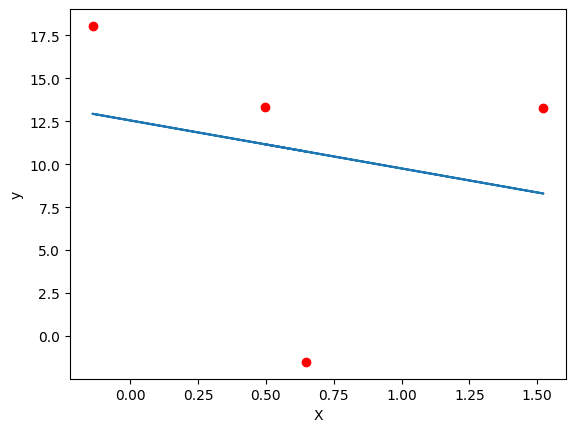

In [ ]:
# Now lets plot the predicted line for the dataset
# We would want our line to be as close as this line predicted by the LinearRegression class model.
plt.scatter(X,y,color='red')
plt.plot(X,model.predict(X))
plt.xlabel("X")
plt.ylabel("y")
plt.show()

In [ ]:
# Now lets start using gradient descent 
# First we have the values for slope and also assume b = 0.
# Using this we will substitute this in the formula below.
# Formula use here is basic : y = m*x + b
# Therefore : y_pred = model.coef_*X  + 0

m = model.coef_[0]
b = 0


y_pred = m*X  + b

In [ ]:
m # The slope we took from the model

np.float64(-2.7966661684064484)

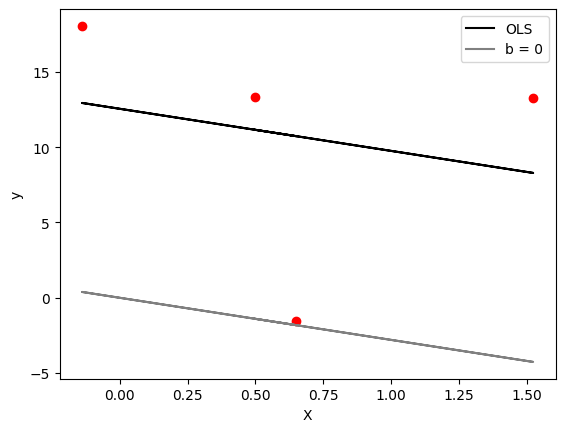

In [ ]:
# Now lets plot this predicted line with predicted line of the model
# As we have not found the intercept(b) we are not able to have a line close to the goal.
# Also if we look closely we can see that the inclination for the both the lines are same ( as m i same ) but 
# there is differnce in y values (because b = 0 for now).
plt.scatter(X,y,color='red')
plt.plot(X,model.predict(X),color='black',label='OLS')
plt.plot(X,y_pred,color='grey',label='b = 0') 
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.show()

In [144]:
# Now lets predict the next b value using the formula :
# bnew = bold - eta*slope(loss)

# Now to calculate the loss slope we use the formula :
# - 2*summation(yi - m*X - b)
loss_slope = -2 * np.sum(y-(m*X.ravel()) - b) # Ravel to flatten the numpy array
loss_slope

np.float64(-100.40630221884612)

In [145]:
# We assume l(learning rate) to be 0.1 . The smaller the more iterations to reach but more precise .
l = 0.1
# step_size = learningrate * loss_slope
step_size = l * loss_slope
step_size

np.float64(-10.040630221884612)

In [146]:
# Lets calculate the new intercept with this (bnew)
b = b - step_size
b

np.float64(10.040630221884612)

In [147]:
y_pred1 = (m*X  + b).reshape(4) # Reshaped for plotting 
y_pred1 

array([ 8.2292616 , 10.42730932,  5.78122415,  8.65148655])

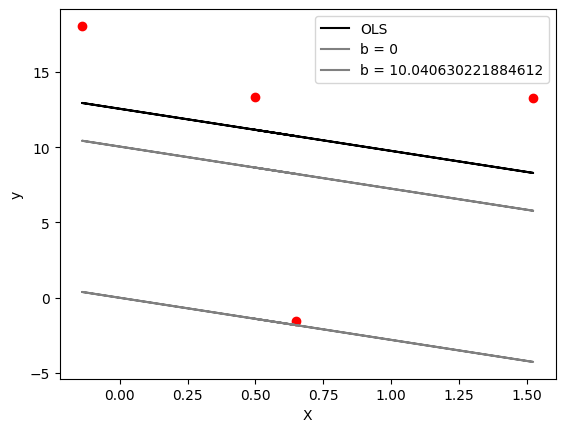

In [148]:
# Now lets plot again 
plt.scatter(X,y,color='red')
plt.plot(X,model.predict(X),color='black',label='OLS')
plt.plot(X,y_pred,color='grey',label='b = 0')
plt.plot(X,y_pred1,color='grey',label=f'b = {b}')
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.show()

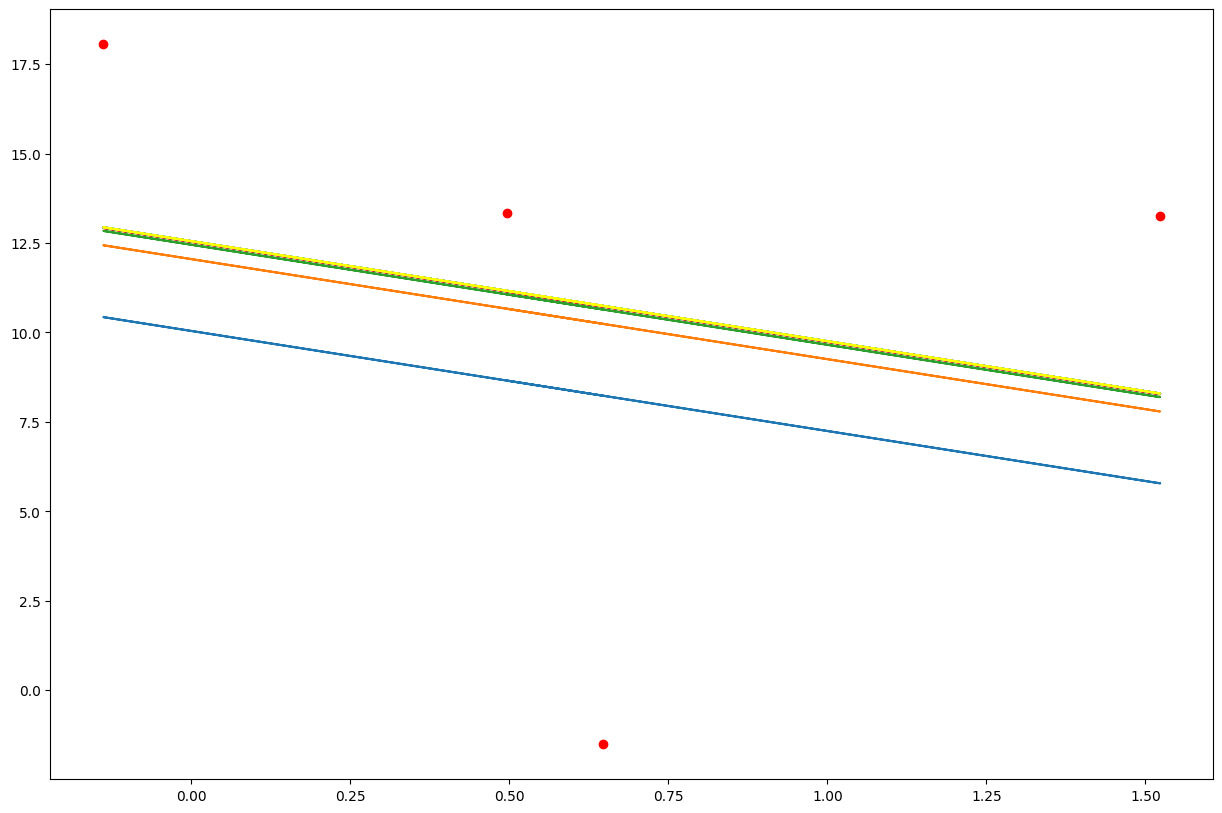

In [168]:
# Lets iterate this in a loop 
b = 0 
l = 0.1 # 0.01
m = model.coef_

epochs = 10 #25 #100  # No of iterations
plt.figure(figsize=(15,10))
for i in range(epochs):
    loss_slope = -2 * (np.sum(y - (m*X.ravel()) - b))
    step_size = loss_slope * l
    b = b - step_size

    y_pred = m*X + b 

    plt.plot(X,y_pred)

plt.scatter(X,y,color='red')
plt.plot(X,model.predict(X),color='yellow',label='OLS')
plt.show()